In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

### Encoding problem

In [2]:
# df = pd.read_csv('spotify-2023.csv' ,encoding='utf-8')

In [3]:
#!pip install chardet

### Method 1 identify the correct encoding

In [4]:
import chardet

with open('spotify-2023.csv', 'rb') as file:
    result = chardet.detect(file.read())
    print(result['encoding'])


ISO-8859-1


In [5]:
df = pd.read_csv('spotify-2023.csv' ,encoding='ISO-8859-1')

In [6]:
df.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


### Method 2 ignore the encoding errors

In [7]:
df2 = pd.read_csv('spotify-2023.csv', encoding='utf-8', encoding_errors='ignore')

In [8]:
df2.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


In [9]:
df.isnull().sum()

track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        50
bpm                      0
key                     95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
dtype: int64

In [10]:
df[df['in_shazam_charts'].isna()][['track_name','artist(s)_name','artist_count','released_year', 'in_shazam_charts']].sample(4)

,track_name,artist(s)_name,artist_count,released_year,in_shazam_charts
504,Out of Time,The Weeknd,1,2022,NaN
158,Ghost,Justin Bieber,1,2021,NaN
560,Life Goes On,Oliver Tree,1,2020,NaN
434,Woman,Doja Cat,1,2021,NaN


In [11]:
df.dropna(inplace=True)

In [12]:
df.isnull().sum()

track_name              0
artist(s)_name          0
artist_count            0
released_year           0
released_month          0
released_day            0
in_spotify_playlists    0
in_spotify_charts       0
streams                 0
in_apple_playlists      0
in_apple_charts         0
in_deezer_playlists     0
in_deezer_charts        0
in_shazam_charts        0
bpm                     0
key                     0
mode                    0
danceability_%          0
valence_%               0
energy_%                0
acousticness_%          0
instrumentalness_%      0
liveness_%              0
speechiness_%           0
dtype: int64

In [13]:
df.sample()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6


In [14]:
df.describe().columns.shape

(17,)

In [15]:
numerical_columns= df.describe().columns

In [16]:
numerical_columns

Index(['artist_count', 'released_year', 'released_month', 'released_day',
       'in_spotify_playlists', 'in_spotify_charts', 'in_apple_playlists',
       'in_apple_charts', 'in_deezer_charts', 'bpm', 'danceability_%',
       'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%',
       'liveness_%', 'speechiness_%'],
      dtype='object')

In [17]:
total_columns = df.columns

In [18]:
total_columns

Index(['track_name', 'artist(s)_name', 'artist_count', 'released_year',
       'released_month', 'released_day', 'in_spotify_playlists',
       'in_spotify_charts', 'streams', 'in_apple_playlists', 'in_apple_charts',
       'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts', 'bpm',
       'key', 'mode', 'danceability_%', 'valence_%', 'energy_%',
       'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%'],
      dtype='object')

### non numerical columns

In [19]:
non_numeric_col = []
for col in total_columns:
    if col not in numerical_columns.values:
        non_numeric_col.append(col)
        print(col,"--->dtype----------->", type(col))

track_name --->dtype-----------> <class 'str'>
artist(s)_name --->dtype-----------> <class 'str'>
streams --->dtype-----------> <class 'str'>
in_deezer_playlists --->dtype-----------> <class 'str'>
in_shazam_charts --->dtype-----------> <class 'str'>
key --->dtype-----------> <class 'str'>
mode --->dtype-----------> <class 'str'>


In [20]:
df['streams'].sample(3)

764    723894473
541     41924466
476    295998468
Name: streams, dtype: object

In [21]:
df['in_deezer_playlists'].sample(3)

81     71
647    15
545    93
Name: in_deezer_playlists, dtype: object

In [22]:
df['in_shazam_charts'].sample(3)

889    1
476    0
53     0
Name: in_shazam_charts, dtype: object

In [23]:
df['key'].value_counts()

key
C#    115
G      91
F      87
G#     85
D      78
B      77
A      71
F#     69
E      59
A#     55
D#     30
Name: count, dtype: int64

In [24]:
df['mode'].value_counts()

mode
Major    452
Minor    365
Name: count, dtype: int64

In [25]:
df['artist(s)_name'].value_counts()

artist(s)_name
Taylor Swift           29
SZA                    17
Bad Bunny              16
The Weeknd             15
Kendrick Lamar         12
                       ..
Kanii, PR1ISVX          1
Yng Lvcas               1
NF                      1
Tiï¿½ï¿½sto, Tate M     1
Feid, Sech, Jhayco      1
Name: count, Length: 571, dtype: int64

In [26]:
non_numeric_col

['track_name',
 'artist(s)_name',
 'streams',
 'in_deezer_playlists',
 'in_shazam_charts',
 'key',
 'mode']

In [27]:
for x in non_numeric_col:
    if x in ['track_name', 'artist(s)_name', 'key', 'mode']:
        pass
    else:
     df[x] = pd.to_numeric(df[x], errors='coerce')


In [28]:
df['in_deezer_playlists'] = pd.to_numeric(df['in_deezer_playlists'], errors='coerce')
df['in_deezer_playlists']

0       45.0
1       58.0
2       91.0
3      125.0
4       87.0
       ...  
948     37.0
949      8.0
950      7.0
951     17.0
952     32.0
Name: in_deezer_playlists, Length: 817, dtype: float64

### shortcut code

In [29]:
non_numeric_col = df.select_dtypes(include=['object']).columns
print(non_numeric_col)

for x in non_numeric_col:
    if x in ['track_name', 'artist(s)_name', 'key', 'mode']:
        pass
    else:
        df[x] = pd.to_numeric(df[x], errors='coerce')


Index(['track_name', 'artist(s)_name', 'key', 'mode'], dtype='object')


In [30]:
df.describe().columns.shape

(20,)

In [31]:
df.describe()

,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
count,817.000000,817.000000,817.000000,817.000000,817.000000,817.000000,8.160000e+02,817.000000,817.000000,752.000000,817.000000,813.000000,817.000000,817.000000,817.000000,817.000000,817.000000,817.000000,817.000000,817.000000
mean,1.567931,2018.457772,6.018360,13.696450,4849.898409,11.722154,4.689858e+08,60.161567,49.473684,93.492021,2.451652,51.691267,122.565483,67.391677,51.201958,64.362301,26.309670,1.676867,18.168911,10.526316
std,0.876211,10.829267,3.572554,9.299663,7741.126455,18.617668,5.231267e+08,74.923594,49.570455,155.561951,5.397024,128.746914,28.174803,14.688458,23.620978,16.107587,25.470972,8.767328,13.541996,10.219987
min,1.000000,1930.000000,1.000000,1.000000,31.000000,0.000000,2.762000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,65.000000,23.000000,4.000000,14.000000,0.000000,0.000000,3.000000,2.000000
25%,1.000000,2021.000000,3.000000,5.000000,829.000000,0.000000,1.342848e+08,12.000000,6.000000,12.000000,0.000000,0.000000,99.000000,57.000000,32.000000,53.000000,5.000000,0.000000,10.000000,4.000000
50%,1.000000,2022.000000,5.000000,13.000000,2040.000000,3.000000,2.638368e+08,32.000000,34.000000,32.000000,0.000000,2.000000,120.000000,70.000000,51.000000,66.000000,17.000000,0.000000,12.000000,6.000000
75%,2.000000,2022.000000,9.000000,22.000000,4890.000000,16.000000,6.011986e+08,78.000000,84.000000,99.000000,2.000000,37.000000,141.000000,79.000000,70.000000,76.000000,41.000000,0.000000,24.000000,12.000000
max,8.000000,2023.000000,12.000000,31.000000,52898.000000,147.000000,3.562544e+09,532.000000,275.000000,964.000000,45.000000,953.000000,206.000000,96.000000,97.000000,97.000000,97.000000,91.000000,97.000000,64.000000


In [32]:
df.sample(5)

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
926,Typa Girl,BLACKPINK,1,2022,9,16,452,10,2.355493e+08,2,...,132,G,Major,92,53,62,7,0,63,10
893,Heartless,Kanye West,1,2008,1,1,17504,34,8.879061e+08,63,...,88,A#,Minor,79,66,65,5,0,25,14
123,Que Vuelvas,"Carin Leon, Grupo Frontera",2,2022,12,9,763,26,2.762000e+03,21,...,162,A#,Major,49,78,64,19,0,11,4
750,Falling,Harry Styles,1,2019,12,13,7556,0,1.023187e+09,124,...,110,E,Major,57,6,27,84,0,9,3
130,Queencard,(G)I-DLE,1,2023,5,15,451,33,9.627375e+07,10,...,130,E,Minor,82,69,83,3,0,27,5


In [33]:
df['streams'].max()

3562543890.0

In [34]:
df['streams']= (df['streams']/df['streams'].max())*100

In [35]:
df['streams'].max()

100.0

In [36]:
df['streams'].describe()

count    816.000000
mean      13.164351
std       14.684079
min        0.000078
25%        3.769352
50%        7.405853
75%       16.875542
max      100.000000
Name: streams, dtype: float64

In [37]:
df.sample(15)

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
172,Do I Wanna Know?,Arctic Monkeys,1,2013,1,1,33783,26,50.198019,133,...,85,F,Major,55,42,53,17,0,22,3
13,Daylight,David Kushner,1,2023,4,14,3528,98,10.879045,80,...,130,D,Minor,51,32,43,83,0,9,3
41,Sunflower - Spider-Man: Into the Spider-Verse,"Post Malone, Swae Lee",2,2018,10,9,24094,78,78.822792,372,...,90,D,Major,76,91,50,54,0,7,5
615,The Nights,Avicii,1,2014,1,1,17354,8,40.871958,92,...,126,F#,Major,53,66,85,2,0,24,4
579,Freaks,Surf Curse,1,2015,5,10,3006,3,23.141335,23,...,180,A,Major,35,41,94,0,63,5,5
129,"Rauw Alejandro: Bzrp Music Sessions, Vol. 56","Rauw Alejandro, Bizarrap",2,2023,6,21,871,32,1.877942,25,...,128,B,Major,78,59,65,10,0,26,5
342,Sial,Mahalini,1,2023,1,23,134,4,4.675593,4,...,120,D,Major,56,20,43,89,0,12,4
303,10:35,"Tiï¿½ï¿½sto, Tate M",2,2022,11,1,4942,26,9.139324,190,...,120,G#,Major,70,70,79,7,0,18,10
851,Daydreaming,Harry Styles,1,2022,5,20,1900,1,5.268794,15,...,114,E,Minor,71,90,81,31,2,13,3
176,Shake It Off,Taylor Swift,1,2014,1,1,21335,13,31.265267,328,...,160,G,Major,65,95,80,5,0,41,16


In [77]:
all_artists = df['artist(s)_name'].str.split(',').explode().str.strip()
unique_artists = all_artists.unique()
unique_artists

array(['Latto', 'Jung Kook', 'Myke Towers', 'Olivia Rodrigo',
       'Taylor Swift', 'Bad Bunny', 'Dave', 'Central Cee',
       'Eslabon Armado', 'Peso Pluma', 'Quevedo', 'Gunna', 'Yng Lvcas',
       'Grupo Frontera', 'NewJeans', 'David Kushner', 'SZA',
       'Fifty Fifty', 'Feid', 'Young Miko', 'Jimin', 'Gabito Ballesteros',
       'Junior H', 'Bizarrap', 'The Weeknd', 'Madonna', 'Playboi Carti',
       'Fuerza Regida', 'Rï¿½ï¿½ma', 'Selena G', 'Tainy', 'Morgan Wallen',
       'Dua Lipa', 'Troye Sivan', '21 Savage', 'Metro Boomin', 'Karol G',
       'Shakira', 'Yahritza Y Su Esencia', 'Post Malone', 'Swae Lee',
       'Bebe Rexha', 'David Guetta', 'Tyler', 'The Creator', 'Kali Uchis',
       'Miley Cyrus', 'Daft Punk', 'Ariana Grande', 'Sky Rompiendo',
       'Anne-Marie', 'Coi Leray', 'Peggy Gou', 'Manuel Turizo', 'dennis',
       'MC Kevin o Chris', 'PinkPantheress', 'Ice Spice', 'Charlie Puth',
       'BTS', 'Rauw Alejandro', 'ROSALï¿½', 'Ozuna', 'Chris Molitor',
       'Libianca'

In [74]:
artist_counts = all_artists.value_counts()
result_df = artist_counts.reset_index()
result_df.columns = ['artist', 'artist_counts']

# Add the 'popularity' column based on conditions
result_df['popularity'] = result_df['artist_counts'].apply(
    lambda x: 'top artist' if x > 15 else 'popular' if 5 <= x <= 15 else 'new'
)
result_df

,artist,artist_counts,popularity
0,Bad Bunny,36,top artist
1,Taylor Swift,32,top artist
2,The Weeknd,27,top artist
3,Kendrick Lamar,23,top artist
4,Feid,21,top artist
...,...,...,...
623,P!nk,1,new
624,King,1,new
625,Wisin & Yandel,1,new
626,Fujii Kaze,1,new


In [80]:
# Map popularity categories to scores
popularity_scores = {'top artist': 10, 'popular': 5, 'new': 1}

# Add the popularity score to the result DataFrame
result_df['popularity_score'] = result_df['popularity'].map(popularity_scores)

# Function to calculate artist popularity score for each row in the original DataFrame
def calculate_artist_popularity(artist_list):
    artists = [artist.strip() for artist in artist_list.split(',')]  # Split and clean artist names
    score = sum(result_df[result_df['artist'].isin(artists)]['popularity_score'])  # Sum scores for artists in the list
    return score

# Apply the function to calculate artist popularity scores
df['artist_popularity_score'] = df['artist(s)_name'].apply(calculate_artist_popularity)

# Display the modified DataFrame
df

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,artist_popularity_score
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,3.968560,43,...,B,Major,80,89,83,31,0,8,4,2
1,LALA,Myke Towers,1,2023,3,23,1474,48,3.753393,48,...,C#,Major,71,61,74,7,0,10,4,1
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,3.929888,94,...,F,Major,51,32,53,17,0,31,6,5
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,22.479465,116,...,A,Major,55,58,72,11,0,11,15,10
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,8.511792,84,...,A,Minor,65,23,80,14,63,11,6,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,2.567642,61,...,A,Major,60,24,39,57,0,8,3,1
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,3.420923,4,...,F#,Major,42,7,24,83,1,12,6,10
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,2.063517,2,...,C#,Major,80,81,67,4,0,8,6,11
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,3.758427,29,...,C#,Major,82,67,77,8,0,12,5,12


In [84]:
result_df[result_df['artist']=='Jung Kook']

,artist,artist_counts,popularity,popularity_score
62,Jung Kook,4,new,1


In [38]:
from sklearn.feature_extraction.text import CountVectorizer

In [39]:
# vectorizer = CountVectorizer(tokenizer=lambda x: x.split(','))

# # Fit and transform the data
# artist_vectors = vectorizer.fit_transform(df['artist(s)_name'])

# # Convert the result into a DataFrame for better readability
# artist_vector_df = pd.DataFrame(artist_vectors.toarray(), columns=vectorizer.get_feature_names_out())

# # Display the DataFrame
# artist_vector_df

In [81]:
df.columns

Index(['track_name', 'artist(s)_name', 'artist_count', 'released_year',
       'released_month', 'released_day', 'in_spotify_playlists',
       'in_spotify_charts', 'streams', 'in_apple_playlists', 'in_apple_charts',
       'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts', 'bpm',
       'key', 'mode', 'danceability_%', 'valence_%', 'energy_%',
       'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%',
       'artist_popularity_score'],
      dtype='object')

In [40]:
import seaborn as sns

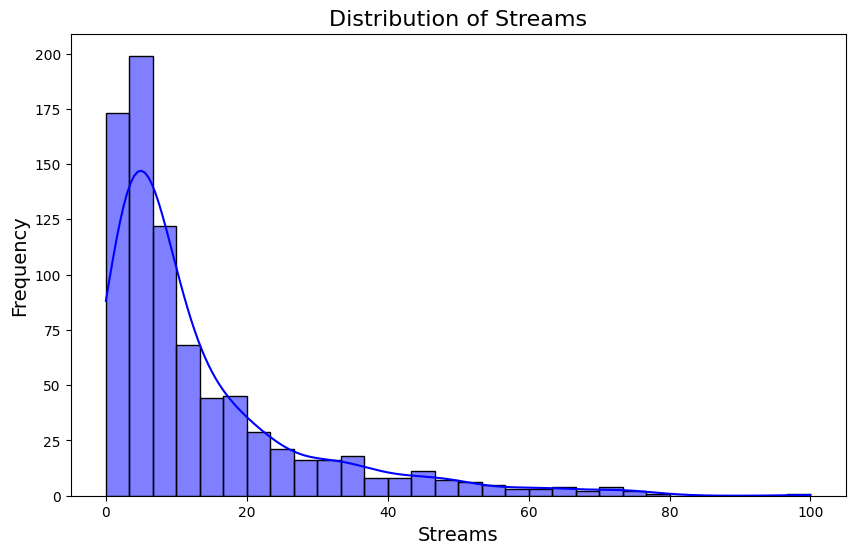

In [41]:
plt.figure(figsize=(10, 6))
sns.histplot(df['streams'], kde=True, bins=30, color='blue')
plt.title("Distribution of Streams", fontsize=16)
plt.xlabel("Streams", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.show()

In [85]:
df.columns

Index(['track_name', 'artist(s)_name', 'artist_count', 'released_year',
       'released_month', 'released_day', 'in_spotify_playlists',
       'in_spotify_charts', 'streams', 'in_apple_playlists', 'in_apple_charts',
       'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts', 'bpm',
       'key', 'mode', 'danceability_%', 'valence_%', 'energy_%',
       'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%',
       'artist_popularity_score'],
      dtype='object')

In [86]:
df2 = df.drop(columns=['track_name', 'artist(s)_name','artist_count', 'released_year',
       'released_month', 'released_day', 'key', 'mode'])

In [90]:
df2.sample(3)

,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,artist_popularity_score
698,3501,0,8.410689,69,2,51.0,11,0.0,124,81,68,63,17,0,10,22,6
424,21811,0,28.767599,117,1,676.0,3,0.0,108,63,20,55,72,0,6,6,1
630,51979,15,50.711451,306,99,NaN,2,120.0,148,35,24,93,0,0,10,8,1


In [88]:
df2.columns

Index(['in_spotify_playlists', 'in_spotify_charts', 'streams',
       'in_apple_playlists', 'in_apple_charts', 'in_deezer_playlists',
       'in_deezer_charts', 'in_shazam_charts', 'bpm', 'danceability_%',
       'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%',
       'liveness_%', 'speechiness_%', 'artist_popularity_score'],
      dtype='object')

In [91]:
df2.isnull().sum()

in_spotify_playlists        0
in_spotify_charts           0
streams                     1
in_apple_playlists          0
in_apple_charts             0
in_deezer_playlists        65
in_deezer_charts            0
in_shazam_charts            4
bpm                         0
danceability_%              0
valence_%                   0
energy_%                    0
acousticness_%              0
instrumentalness_%          0
liveness_%                  0
speechiness_%               0
artist_popularity_score     0
dtype: int64

In [92]:
df2.dropna(inplace=True)

In [94]:
df2.isnull().sum()

in_spotify_playlists       0
in_spotify_charts          0
streams                    0
in_apple_playlists         0
in_apple_charts            0
in_deezer_playlists        0
in_deezer_charts           0
in_shazam_charts           0
bpm                        0
danceability_%             0
valence_%                  0
energy_%                   0
acousticness_%             0
instrumentalness_%         0
liveness_%                 0
speechiness_%              0
artist_popularity_score    0
dtype: int64

In [95]:
df2.shape

(748, 17)

In [96]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df2, df2['streams'], test_size = 0.2 ,random_state = 2)

In [97]:
X_train

,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,artist_popularity_score
597,4846,10,11.864866,54,16,259.0,0,13.0,101,67,40,90,3,0,34,6,3
303,4942,26,9.139324,190,104,147.0,18,63.0,120,70,70,79,7,0,18,10,2
327,34,0,1.914839,0,0,0.0,0,0.0,92,71,41,31,79,0,10,5,1
20,332,26,2.426492,11,163,10.0,4,0.0,140,65,87,74,22,0,42,4,11
645,580,0,7.250887,24,92,93.0,0,0.0,122,80,62,69,28,0,13,7,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
703,200,2,5.689122,12,4,0.0,0,0.0,72,64,76,44,70,9,12,4,1
768,2575,0,4.404109,4,5,12.0,0,51.0,87,52,32,83,24,0,17,43,10
648,6809,28,20.114601,151,102,175.0,5,29.0,94,84,90,70,9,0,14,8,6
695,13454,1,40.397856,246,71,519.0,2,5.0,99,68,57,77,2,0,10,5,5


### Ready for binning

In [98]:
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LinearRegression

from sklearn.metrics import r2_score

In [100]:
lr = LinearRegression()

lr.fit(X_train,y_train)

y_pred = lr.predict(X_test)
np.mean(cross_val_score(lr,X_train,y_train,scoring='r2'))

1.0

In [101]:
r2_score(y_test,y_pred)

1.0